<a href="https://colab.research.google.com/github/pabloxD13/Bootcamp_Data_Science_Alura_2/blob/main/pyspark_alura_challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Realizando instalação do spark e suas dependências

In [ ]:
!pip install pyspark==3.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 45 kB/s 
     |████████████████████████████████| 199 kB 99.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=4d05af9d6c83dce78858e4550ca56b7d5fa40f6c48c9e94458731359c1c8c4a7
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
#Spark Session
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master('local[*]') \
    .appName("Projeto Insight Places") \
    .getOrCreate()

#Montando Drive e carregando os dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Alura/Challenge_2'

In [ ]:
# Carregando os dados e avaliando seus tipos
dados = spark.read.json('/content/drive/MyDrive/Alura/Challenge_2/dataset_bruto.json')
dados.printSchema()

root
 |-- anuncio: struct (nullable = true)
 |    |-- andar: long (nullable = true)
 |    |-- area_total: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- area_util: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- banheiros: array (nullable = true)
 |    |    |-- element: long (containsNull = true)
 |    |-- caracteristicas: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- endereco: struct (nullable = true)
 |    |    |-- bairro: string (nullable = true)
 |    |    |-- cep: string (nullable = true)
 |    |    |-- cidade: string (nullable = true)
 |    |    |-- estado: string (nullable = true)
 |    |    |-- latitude: double (nullable = true)
 |    |    |-- longitude: double (nullable = true)
 |    |    |-- pais: string (nullable = true)
 |    |    |-- rua: string (nullable = true)
 |    |    |-- zona: string (nullable = true)
 |    |-- id: string (nullable = true)
 |    |-

#Seleção da coluna de anúncios

In [ ]:
#Selecionando as colunas de anuncio pois são as mais relevantes para as análises
anuncio = dados\
    .select(
        'anuncio.*'
    )

In [ ]:
anuncio.show(2, truncate = False)

+-----+----------+---------+---------+---------------+-------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+---------+----+--------------------------+
|andar|area_total|area_util|banheiros|caracteristicas|endereco                                                                                                     |id                                  |quartos|suites|tipo_anuncio|tipo_unidade|tipo_uso |vaga|valores                   |
+-----+----------+---------+---------+---------------+-------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+---------+----+--------------------------+
|0    |[]        |[16]     |[0]      |[]             |{Centro, 20061003, Rio de Janeiro, Rio de Janeiro, -22.906082, -43.18671, BR, Rua Buenos Ai

In [ ]:
anuncio\
    .select('tipo_uso')\
    .groupBy('tipo_uso')\
    .count()\
    .show()

+-----------+-----+
|   tipo_uso|count|
+-----------+-----+
|  Comercial| 4542|
|Residencial|84541|
+-----------+-----+



In [ ]:
anuncio = anuncio.filter("tipo_uso == 'Residencial'")

In [ ]:
anuncio\
    .groupBy('tipo_unidade')\
    .count()\
    .show()

+------------+-----+
|tipo_unidade|count|
+------------+-----+
|      Outros| 7517|
| Apartamento|66797|
|        Casa|10227|
+------------+-----+



In [ ]:
anuncio = anuncio.filter("tipo_unidade == 'Apartamento'")

In [ ]:
anuncio = anuncio.filter("tipo_anuncio == 'Usado'")

In [ ]:
anuncio.show(5)

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|             valores|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|    3|      [43]|     [43]|      [1]|[Academia, Churra...|{Paciência, 23585...|d2e3a3aa-09b5-45a...|    [2]|    []|       Usado| Apartamento|Residencial| [1]|[{245, null, Vend...|
|    2|      [42]|     [42]|      [1]|[Churrasqueira, P...|{Paciência, 23585...|085bab2c-87ad-452...|    [2]|    []|       Usado| Apartamento|Residencial| [1]|[{0, 0, Venda, 15...|
|    1|      [41]|     [41]|      [1]|[Portaria 24h, Co...|{Guaratiba, 23036...|18d22cbe-1b86-4

In [ ]:
from pyspark.sql.types import DoubleType, StringType, IntegerType
from pyspark.sql import functions as f

In [ ]:
anuncio\
    .select(f.size(f.col('quartos')).alias('quartos'))\
    .groupBy('quartos')\
    .count()\
    .show()

+-------+-----+
|quartos|count|
+-------+-----+
|      1|66562|
+-------+-----+



In [ ]:
caracteristicas = ['quartos', 'suites', 'banheiros', 'vaga', 'area_total', 'area_util']

In [ ]:
for col in caracteristicas:
    anuncio\
        .select(f.size(f.col(col)).alias(col))\
        .groupBy(col)\
        .count()\
        .show()

+-------+-----+
|quartos|count|
+-------+-----+
|      1|66562|
+-------+-----+

+------+-----+
|suites|count|
+------+-----+
|     1|61008|
|     0| 5554|
+------+-----+

+---------+-----+
|banheiros|count|
+---------+-----+
|        1|66562|
+---------+-----+

+----+-----+
|vaga|count|
+----+-----+
|   1|63545|
|   0| 3017|
+----+-----+

+----------+-----+
|area_total|count|
+----------+-----+
|         1|57368|
|         0| 9194|
+----------+-----+

+---------+-----+
|area_util|count|
+---------+-----+
|        1|66562|
+---------+-----+



In [ ]:
anuncio = anuncio\
    .select([f.col(c)[0].alias(c) if c in caracteristicas else c for c in anuncio.columns])

In [ ]:
#Tranformando as variáveis de StringType para IntegerType
anuncio = anuncio.withColumn('area_total', anuncio['area_total'].cast(DoubleType()))
anuncio = anuncio.withColumn('area_util', anuncio['area_util'].cast(DoubleType()))
anuncio = anuncio.withColumn('banheiros', anuncio['banheiros'].cast(IntegerType()))
anuncio = anuncio.withColumn('quartos', anuncio['quartos'].cast(IntegerType()))
anuncio = anuncio.withColumn('vaga', anuncio['vaga'].cast(IntegerType()))
anuncio = anuncio.withColumn('suites', anuncio['suites'].cast(IntegerType()))

In [ ]:
anuncio.printSchema()

root
 |-- andar: long (nullable = true)
 |-- area_total: double (nullable = true)
 |-- area_util: double (nullable = true)
 |-- banheiros: integer (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- endereco: struct (nullable = true)
 |    |-- bairro: string (nullable = true)
 |    |-- cep: string (nullable = true)
 |    |-- cidade: string (nullable = true)
 |    |-- estado: string (nullable = true)
 |    |-- latitude: double (nullable = true)
 |    |-- longitude: double (nullable = true)
 |    |-- pais: string (nullable = true)
 |    |-- rua: string (nullable = true)
 |    |-- zona: string (nullable = true)
 |-- id: string (nullable = true)
 |-- quartos: integer (nullable = true)
 |-- suites: integer (nullable = true)
 |-- tipo_anuncio: string (nullable = true)
 |-- tipo_unidade: string (nullable = true)
 |-- tipo_uso: string (nullable = true)
 |-- vaga: integer (nullable = true)
 |-- valores: array (nullable = true)
 | 

#Seleção dos campos de endereço

In [ ]:
#Selecionando as colunas Bairro e Zona da coluna endereço.
anuncio_end = anuncio\
    .select(['id','endereco.bairro','endereco.zona'])

In [ ]:
anuncio_end = anuncio_end.withColumnRenamed("id","id_endereco")
anuncio_end.show(2, truncate = False)

+------------------------------------+---------+----------+
|id_endereco                         |bairro   |zona      |
+------------------------------------+---------+----------+
|d2e3a3aa-09b5-45a0-9dcd-918847cd3ca3|Paciência|Zona Oeste|
|085bab2c-87ad-452a-bd0f-8b1451509f84|Paciência|Zona Oeste|
+------------------------------------+---------+----------+
only showing top 2 rows



In [ ]:
anuncio = anuncio.join(anuncio_end, anuncio_end.id_endereco == anuncio.id, 'inner')

In [ ]:
#Retirando as colunas de id e de endereço
anuncio = anuncio.drop('id_endereco')
anuncio = anuncio.drop('endereco')

In [ ]:
anuncio.show(2, truncate=False)

+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+-----------+----+---------------------------+--------+----------+
|andar|area_total|area_util|banheiros|caracteristicas                                                                                                                |id                                  |quartos|suites|tipo_anuncio|tipo_unidade|tipo_uso   |vaga|valores                    |bairro  |zona      |
+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+-----------+----+---------------------------+--------+----------+
|0    |43.0      |43.0     |1        |[Churrasqueira, Academia, Playgr

#Transformação dos campos de valores

In [ ]:
#Transformando cada campo da coluna "valores" em uma coluna separada
anuncio_select = anuncio.select(['id','valores.condominio','valores.iptu','valores.tipo','valores.valor'])

In [ ]:
anuncio_valores = anuncio_select.withColumnRenamed("id","id_valores")

In [ ]:
# Tranformando as variáveis de array para seu determinado tipo
colunas_corrigir_valores = ['condominio', 'iptu', 'tipo', 'valor']
anuncio_valores = anuncio_valores.select([f.col(c)[0].alias(c) if c in colunas_corrigir_valores else c for c in anuncio_valores.columns])

In [ ]:
anuncio_valores = anuncio_valores.withColumn('condominio', anuncio_valores['condominio'].cast(DoubleType()))
anuncio_valores = anuncio_valores.withColumn('iptu', anuncio_valores['iptu'].cast(DoubleType()))
anuncio_valores = anuncio_valores.withColumn('valor', anuncio_valores['valor'].cast(DoubleType()))

In [ ]:
anuncio = anuncio.join(anuncio_valores, anuncio_valores['id_valores'] == anuncio.id, 'inner')

In [ ]:
anuncio = anuncio.drop('id_valores')

In [ ]:
anuncio = anuncio.drop('valores')

In [ ]:
anuncio.show(5, truncate = False)

+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+-----------+----+------------+------------+----------+------+-----+--------+
|andar|area_total|area_util|banheiros|caracteristicas                                                                                                                |id                                  |quartos|suites|tipo_anuncio|tipo_unidade|tipo_uso   |vaga|bairro      |zona        |condominio|iptu  |tipo |valor   |
+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+-----------+----+------------+------------+----------+------+-----+--------+
|0    |43.0      |43.0     |1        

#Filtrando os tipos de negociação

In [ ]:
anuncio.groupBy('tipo')\
    .count()\
    .show()

+-------+-----+
|   tipo|count|
+-------+-----+
|Aluguel|  214|
|  Venda|66348|
+-------+-----+



In [ ]:
anuncio.filter(anuncio['tipo'] == 'Venda').show()

+-----+----------+---------+---------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+------------+----------+------+-----+--------+
|andar|area_total|area_util|banheiros|     caracteristicas|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|              bairro|        zona|condominio|  iptu| tipo|   valor|
+-----+----------+---------+---------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+------------+----------+------+-----+--------+
|    0|      43.0|     43.0|        1|[Churrasqueira, A...|03a386b6-7ab8-4ef...|      2|  null|       Usado| Apartamento|Residencial|   1|            Realengo|  Zona Oeste|     285.0|  null|Venda| 22999.0|
|    0|      44.0|     44.0|        1|                  []|1fe78d41-b8e0-4d2...|      2|     0|       Usado| Apartamento|Residencial|   0|               Irajá|  Zona Norte|    

In [ ]:
anuncio = anuncio.filter(anuncio['tipo'] == 'Venda')

In [ ]:
anuncio.printSchema()

root
 |-- andar: long (nullable = true)
 |-- area_total: double (nullable = true)
 |-- area_util: double (nullable = true)
 |-- banheiros: integer (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- id: string (nullable = true)
 |-- quartos: integer (nullable = true)
 |-- suites: integer (nullable = true)
 |-- tipo_anuncio: string (nullable = true)
 |-- tipo_unidade: string (nullable = true)
 |-- tipo_uso: string (nullable = true)
 |-- vaga: integer (nullable = true)
 |-- bairro: string (nullable = true)
 |-- zona: string (nullable = true)
 |-- condominio: double (nullable = true)
 |-- iptu: double (nullable = true)
 |-- tipo: string (nullable = true)
 |-- valor: double (nullable = true)



#Salvando os arquivos em parquet e csv e comparando o desempenho dos dois

In [ ]:
#Salvando o arquivo em formato parquet
anuncio.write.parquet(
    path='/content/drive/MyDrive/Alura/Challenge_2/anuncio/parquet', 
    mode='overwrite')

In [ ]:
anuncio.show(3, truncate = False)

+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+-----------+----+--------+----------+----------+----+-----+--------+
|andar|area_total|area_util|banheiros|caracteristicas                                                                                                                |id                                  |quartos|suites|tipo_anuncio|tipo_unidade|tipo_uso   |vaga|bairro  |zona      |condominio|iptu|tipo |valor   |
+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+-----------+----+--------+----------+----------+----+-----+--------+
|0    |43.0      |43.0     |1        |[Churrasqueira, Academi

In [ ]:
from pyspark.sql.functions import col, concat_ws

In [ ]:
#Transformando a coluna de características e salvando em csv
# Transformando a coluna 'caracteristicas' de Array para String
anuncio_csv = anuncio.withColumn('caracteristicas', concat_ws(",",col("caracteristicas")))

In [ ]:
anuncio_csv.write.csv(
    path='/content/drive/MyDrive/Alura/Challenge_2/anuncio/csv',
    mode='overwrite',
    sep=';',
    header=True
)

##Calculando tempo para leitura dos arquivos

In [ ]:
# Arquivo .parquet
%%time

parquet_file = spark.read.parquet('/content/drive/MyDrive/Alura/Challenge_2/anuncio/parquet')
parquet_file.show()

+-----+----------+---------+---------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+------------+----------+------+-----+--------+
|andar|area_total|area_util|banheiros|     caracteristicas|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|              bairro|        zona|condominio|  iptu| tipo|   valor|
+-----+----------+---------+---------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+------------+----------+------+-----+--------+
|    0|      43.0|     43.0|        1|[Churrasqueira, A...|03a386b6-7ab8-4ef...|      2|  null|       Usado| Apartamento|Residencial|   1|            Realengo|  Zona Oeste|     285.0|  null|Venda| 22999.0|
|    0|      44.0|     44.0|        1|                  []|1fe78d41-b8e0-4d2...|      2|     0|       Usado| Apartamento|Residencial|   0|               Irajá|  Zona Norte|    

In [ ]:
# Arquivo .csv
%%time

csv_file = spark.read.option('header',True).csv('/content/drive/MyDrive/Alura/Challenge_2/anuncio/csv')
csv_file.show()

+-----------------------------------------------------------------------------------------------------------------------------------------------------+
|andar;area_total;area_util;banheiros;caracteristicas;id;quartos;suites;tipo_anuncio;tipo_unidade;tipo_uso;vaga;bairro;zona;condominio;iptu;tipo;valor|
+-----------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                                 0;43.0;43.0;1;Chu...|
|                                                                                                                                 0;44.0;44.0;1;"";...|
|                                                                                                                                 4;;55.0;1;"";1fa1...|
|                                                                                       


#Seleção de features

In [ ]:
anuncio.limit(3).toPandas()

,andar,area_total,area_util,banheiros,caracteristicas,id,quartos,suites,tipo_anuncio,tipo_unidade,tipo_uso,vaga,bairro,zona,condominio,iptu,tipo,valor
0,0,43.0,43.0,1,"[Churrasqueira, Academia, Playground, Salão de...",03a386b6-7ab8-4eff-891d-f8a16efc1989,2,NaN,Usado,Apartamento,Residencial,1,Realengo,Zona Oeste,285.0,NaN,Venda,22999.0
1,0,44.0,44.0,1,[],1fe78d41-b8e0-4d21-a1a8-72cb7863f441,2,0.0,Usado,Apartamento,Residencial,0,Irajá,Zona Norte,170.0,0.0,Venda,110000.0
2,4,NaN,55.0,1,[],1fa1c1e5-e98c-433f-9675-1b43d7d6da01,2,0.0,Usado,Apartamento,Residencial,1,Cosmos,Zona Oeste,NaN,NaN,Venda,115000.0


In [ ]:
anuncio.printSchema()

root
 |-- andar: long (nullable = true)
 |-- area_total: double (nullable = true)
 |-- area_util: double (nullable = true)
 |-- banheiros: integer (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- id: string (nullable = true)
 |-- quartos: integer (nullable = true)
 |-- suites: integer (nullable = true)
 |-- tipo_anuncio: string (nullable = true)
 |-- tipo_unidade: string (nullable = true)
 |-- tipo_uso: string (nullable = true)
 |-- vaga: integer (nullable = true)
 |-- bairro: string (nullable = true)
 |-- zona: string (nullable = true)
 |-- condominio: double (nullable = true)
 |-- iptu: double (nullable = true)
 |-- tipo: string (nullable = true)
 |-- valor: double (nullable = true)



In [ ]:
#Verificando a semelhança das colunas area_total e area_util 
areas_iguais = anuncio.where(anuncio["area_total"] == anuncio["area_util"]).count()
total = anuncio.count()

In [ ]:
print(f"O número de valores iguais de área total e area útil é: {areas_iguais}\n Isso representa {areas_iguais/total*100:.2f}% do dataset")

O número de valores iguais de área total e area útil é: 55185
 Isso representa 83.18% do dataset


In [ ]:
#Vemos que a coluna area_total tem 9186 valores nulos, ou seja, essa coluna pode ser excluída de nosso dataset devido a sua semelhança coma coluna area_util e seu número de valores nulos
anuncio\
    .select([f.count(f.when(f.isnan(c) | f.isnull(c), True)).alias(c) for c in ['area_util', 'area_total']])\
    .show()

+---------+----------+
|area_util|area_total|
+---------+----------+
|        0|      9186|
+---------+----------+



In [ ]:
anuncio = anuncio.drop('area_total')

In [ ]:
#Separando as características de nosso dataset
anuncio_sup = anuncio.select(f.explode('caracteristicas')).distinct().show()

+------------------+
|               col|
+------------------+
|Condomínio fechado|
|        Playground|
| Portão eletrônico|
|           Piscina|
|Animais permitidos|
|      Portaria 24h|
|          Elevador|
|          Academia|
|   Salão de festas|
|     Churrasqueira|
+------------------+



In [ ]:
lista_caracteristicas = ['Condomínio fechado','Playground','Portão eletrônico','Piscina','Animais permitidos','Portaria 24h'\
                         ,'Elevador','Academia','Salão de festas','Churrasqueira']

In [ ]:
for coluna in lista_caracteristicas:
  anuncio = anuncio.withColumn(coluna,f.when(f.array_contains(f.col("caracteristicas"),coluna) == 'true',f.lit(1)).otherwise(0))

In [ ]:
anuncio = anuncio.drop('caracteristicas')

#Tratamento de dados nulos

In [ ]:
anuncio\
    .select([f.count(f.when(f.isnan(c) | f.isnull(c), True)).alias(c) for c in anuncio.columns])\
    .show()

+-----+---------+---------+---+-------+------+------------+------------+--------+----+------+----+----------+----+----+-----+------------------+----------+-----------------+-------+------------------+------------+--------+--------+---------------+-------------+
|andar|area_util|banheiros| id|quartos|suites|tipo_anuncio|tipo_unidade|tipo_uso|vaga|bairro|zona|condominio|iptu|tipo|valor|Condomínio fechado|Playground|Portão eletrônico|Piscina|Animais permitidos|Portaria 24h|Elevador|Academia|Salão de festas|Churrasqueira|
+-----+---------+---------+---+-------+------+------------+------------+--------+----+------+----+----------+----+----+-----+------------------+----------+-----------------+-------+------------------+------------+--------+--------+---------------+-------------+
|    0|        0|        0|  0|      0|  5544|           0|           0|       0|3008|     0|   0|      2347|7155|   0|    0|                 0|         0|                0|      0|                 0|           0| 

In [ ]:
#Utilizando a biblioteca ml para substituir os dados faltantes pela mediana dos dados
from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols=['suites', 'vaga', 'condominio', 'iptu'], 
    outputCols=['suites', 'vaga', 'condominio', 'iptu']
    ).setStrategy("median")

In [ ]:
anuncio = imputer.fit(anuncio).transform(anuncio)

In [ ]:
#Existem valores cuja zona está vazia, esses dados serão retirados do dataset
anuncio\
    .groupBy('zona')\
    .count()\
    .orderBy('count', ascending = False)\
    .show(5)

+------------+-----+
|        zona|count|
+------------+-----+
|  Zona Oeste|32879|
|    Zona Sul|20471|
|  Zona Norte|11853|
|Zona Central| 1134|
|            |   11|
+------------+-----+



In [ ]:
anuncio = anuncio\
    .where(f.col('zona') != '')

In [ ]:
#Criando as variáveis dummy para a coluna de zona
zona = anuncio\
    .groupBy('id')\
    .pivot('zona')\
    .agg(f.lit(1))\
    .na\
    .fill(0)


In [ ]:
anuncio = anuncio\
    .join(zona, 'id', how='inner')

In [ ]:
anuncio = anuncio.drop('zona')

#Salvado o arquivo em formato Parquet

In [ ]:
# No dataset há colunas com acento e letras maiusculas em seus nomes
colunas = anuncio.columns
colunas

['id',
 'andar',
 'area_util',
 'banheiros',
 'quartos',
 'suites',
 'tipo_anuncio',
 'tipo_unidade',
 'tipo_uso',
 'vaga',
 'bairro',
 'condominio',
 'iptu',
 'tipo',
 'valor',
 'Condomínio fechado',
 'Playground',
 'Portão eletrônico',
 'Piscina',
 'Animais permitidos',
 'Portaria 24h',
 'Elevador',
 'Academia',
 'Salão de festas',
 'Churrasqueira',
 'Zona Central',
 'Zona Norte',
 'Zona Oeste',
 'Zona Sul']

In [ ]:
colunas_novas = [
    'id',
    'andar',
    'area_util',
    'banheiros',
    'quartos',
    'suites',
    'tipo_anuncio',
    'tipo_unidade',
    'tipo_uso',
    'vaga',
    'bairro',
    'condominio',
    'iptu',
    'tipo',
    'valor',
    'condominio_fechado',
    'playground',
    'portao_eletronico',
    'piscina',
    'animais_permitidos',
    'portaria_24h',
    'elevador',
    'academia',
    'salao_de_festas',
    'churrasqueira',
    'zona_central',
    'zona_norte',
    'zona_oeste',
    'zona_sul',    
]

In [ ]:
colunas_nomes = zip(colunas, colunas_novas)

In [ ]:
for colunas, novas in colunas_nomes:
  anuncio = anuncio.withColumnRenamed(colunas, novas)
  

In [ ]:
anuncio.show(3,False)

+------------------------------------+-----+---------+---------+-------+------+------------+------------+-----------+----+-----------+----------+------+-----+---------+------------------+----------+-----------------+-------+------------------+------------+--------+--------+---------------+-------------+------------+----------+----------+--------+
|id                                  |andar|area_util|banheiros|quartos|suites|tipo_anuncio|tipo_unidade|tipo_uso   |vaga|bairro     |condominio|iptu  |tipo |valor    |condominio_fechado|playground|portao_eletronico|piscina|animais_permitidos|portaria_24h|elevador|academia|salao_de_festas|churrasqueira|zona_central|zona_norte|zona_oeste|zona_sul|
+------------------------------------+-----+---------+---------+-------+------+------------+------------+-----------+----+-----------+----------+------+-----+---------+------------------+----------+-----------------+-------+------------------+------------+--------+--------+---------------+------------

In [ ]:
anuncio.withColumnRenamed('salao_de_festas', 'churrasqueira')

DataFrame[id: string, andar: bigint, area_util: double, banheiros: int, quartos: int, suites: int, tipo_anuncio: string, tipo_unidade: string, tipo_uso: string, vaga: int, bairro: string, condominio: double, iptu: double, tipo: string, valor: double, condominio_fechado: int, playground: int, portao_eletronico: int, piscina: int, animais_permitidos: int, portaria_24h: int, elevador: int, academia: int, churrasqueira: int, churrasqueira: int, zona_central: int, zona_norte: int, zona_oeste: int, zona_sul: int]

In [ ]:
#Salvando o arquivo preparado para modelagem em formato parquet
anuncio.write.parquet(
    path='/content/drive/MyDrive/Alura/Challenge_2/anuncio/parquet', 
    mode='overwrite')

#Vetorização dos dados e preparação para machine learning

In [ ]:
from pyspark.ml.feature import VectorAssembler


In [ ]:
anuncio = anuncio.withColumnRenamed('valor','label')


In [ ]:
X = [
    'andar',
    'area_util',
    'banheiros',
    'quartos',
    'suites',
    'vaga',
    'condominio',
    'iptu',
    'condominio_fechado',
    'playground',
    'portao_eletronico',
    'piscina',
    'animais_permitidos',
    'portaria_24h',
    'elevador',
    'academia',
    'salao_de_festas',
    'churrasqueira',
    'zona_central',
    'zona_norte',
    'zona_oeste',
    'zona_sul',   
]


In [ ]:
assembler = VectorAssembler(inputCols = X, outputCol = 'features')


In [ ]:
anuncio_prep = assembler.transform(anuncio).select('features', 'label')


In [ ]:
anuncio_prep.show(10, truncate=False)


+-------------------------------------------------------------------------------------------------+---------+
|features                                                                                         |label    |
+-------------------------------------------------------------------------------------------------+---------+
|(22,[1,2,3,4,5,6,7,14,21],[410.0,3.0,4.0,1.0,1.0,3300.0,5780.0,1.0,1.0])                         |4600000.0|
|(22,[0,1,2,3,4,5,6,7,10,12,14,16,19],[1.0,50.0,1.0,1.0,1.0,1.0,500.0,600.0,1.0,1.0,1.0,1.0,1.0]) |360000.0 |
|(22,[1,2,3,4,5,11,14,17,20],[148.0,4.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0])                             |1200000.0|
|(22,[1,2,3,6,7,14,21],[104.0,1.0,2.0,1010.0,272.0,1.0,1.0])                                      |750000.0 |
|(22,[1,2,3,4,5,6,7,14,21],[71.0,2.0,2.0,1.0,1.0,1312.0,360.0,1.0,1.0])                           |1025000.0|
|[3.0,115.0,2.0,3.0,0.0,0.0,1904.0,3831.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0]|1100000.0|
|[0.0,65.0

#Analisando a correlação dos dados

In [ ]:
from pyspark.ml.stat import Correlation
import pandas as pd

In [ ]:
correlacao = Correlation.corr(anuncio_prep, 'features').collect()[0][0]

In [ ]:
anuncio_correlacao = pd.DataFrame(correlacao.toArray(), columns=X, index=X)


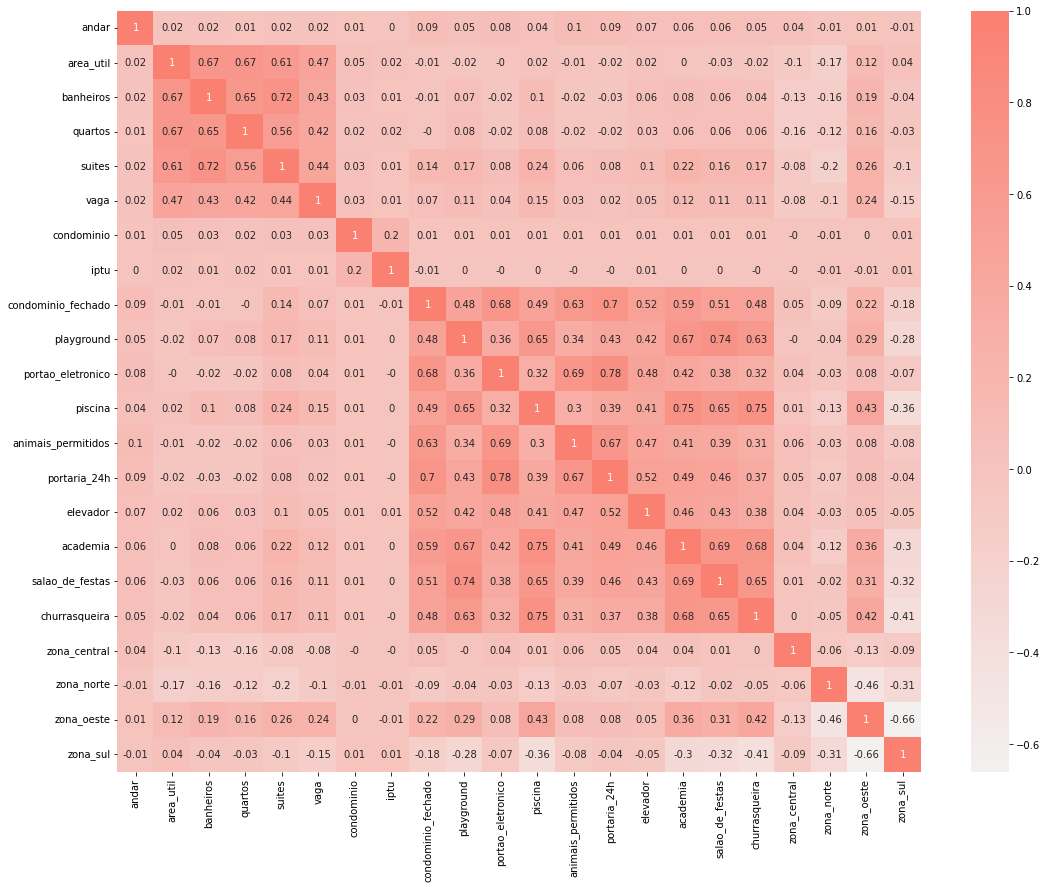

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,14))
paleta = sns.color_palette("light:salmon", as_cmap=True)
sns.heatmap(anuncio_correlacao.round(2), annot=True, cmap=paleta)


Lembrar de fazer comentários sobre o mapa de correlação

#Preparação e criação dos modelos de Machine Learning

In [ ]:
from pyspark.ml.regression import LinearRegression

In [ ]:
treino, teste = anuncio_prep.randomSplit([0.7, 0.3], seed=101)

In [ ]:
lr = LinearRegression()

In [ ]:
modelo_lr = lr.fit(treino)

In [ ]:
previsoes_lr_treino = modelo_lr.transform(treino)

previsoes_lr_treino.show()

+--------------------+---------+------------------+
|            features|    label|        prediction|
+--------------------+---------+------------------+
|(22,[0,1,2,3,4,5,...| 500000.0| 704255.0750946889|
|(22,[0,1,2,3,4,5,...| 200000.0|  329904.763228999|
|(22,[0,1,2,3,4,5,...| 800000.0| 715896.9535295414|
|(22,[0,1,2,3,4,5,...| 599000.0| 454599.0364353041|
|(22,[0,1,2,3,4,5,...| 449000.0| 689902.9773604852|
|(22,[0,1,2,3,4,5,...|1320000.0|1743656.1260949187|
|(22,[0,1,2,3,4,5,...| 960000.0| 1428279.098958625|
|(22,[0,1,2,3,4,5,...|3200000.0| 2976922.977514469|
|(22,[0,1,2,3,4,5,...|1900000.0|1783398.8234580532|
|(22,[0,1,2,3,4,5,...|5784000.0|2916440.6989550395|
|(22,[0,1,2,3,4,5,...| 659000.0| 768028.5241124643|
|(22,[0,1,2,3,4,5,...| 600000.0| 851353.3632138263|
|(22,[0,1,2,3,4,5,...|2100000.0|1310933.9628981464|
|(22,[0,1,2,3,4,5,...|4500000.0|2056248.4056442669|
|(22,[0,1,2,3,4,5,...|6900000.0|3499006.0182349784|
|(22,[0,1,2,3,4,5,...|2900000.0|2176968.1130842986|
|(22,[0,1,2,

In [ ]:
resumo_treino = modelo_lr.summary

In [ ]:
resumo_treino.rootMeanSquaredError

840845.832904251

In [ ]:
resumo_teste = modelo_lr.evaluate(teste)

In [ ]:
print('Linear Regression')
print("="*30)
print("Dados de Treino")
print("="*30)
print("R²: %f" % resumo_treino.r2)
print("RMSE: %f" % resumo_treino.rootMeanSquaredError)
print("")
print("="*30)
print("Dados de Teste")
print("="*30)
print("R²: %f" % resumo_teste.r2)
print("RMSE: %f" % resumo_teste.rootMeanSquaredError)


Linear Regression
Dados de Treino
R²: 0.670510
RMSE: 840845.832904

Dados de Teste
R²: 0.646615
RMSE: 880670.282050
